Построим двумя способами доверительные интервалы для дисперсии нормального распределения, когда математиеское ожидание известно (будем считать, что оно равно нулю).

1. __С помощью статистики__: $\dfrac{\sum{X^2_k}}{n}$

In [32]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [88]:
def first_conf_int(X, n):
    gamma = 0.95
    xk = np.sum(X ** 2)
    l1 = stats.chi2.ppf((1 + gamma) / 2, n)
    l2 = stats.chi2.ppf((1 - gamma) / 2, n)
    
    a, b = xk / l1, xk / l2
    
    return a, b

2. __С помощью статистики:__
$\bigg(\dfrac{\sum{X_k}}{n}\bigg) ^ 2$

In [89]:
def second_conf_int(X, n):
    gamma = 0.95
    xk = n * np.mean(X) ** 2
    l1 = stats.norm.ppf((3 + gamma) / 4) ** 2
    l2 = stats.norm.ppf((3 - gamma) / 4) ** 2
    
    a, b = xk / l1, xk / l2
    
    return a, b

Сравним доверительные интервалы с помощью этих двух статистик для размера выборки от 10 до 1000.

Выборка будет сгенерирована из нормального распределения $\sim\mathcal{N}(0, 1)$

In [99]:
stdev = 1  # установим реальное значение для стандартного отклонения
N = 1000  # максимальный размер выборки
ns = range(10, N, 10) 

first_len = np.array([])
second_len = np.array([])
first_a = np.array([])
first_b = np.array([])
second_a = np.array([])
second_b = np.array([])

for n in range(10, N, 10):
#     генерируем случайную выборку размера 'n'
    X = np.random.normal(loc=0, scale=stdev, size=n)
#     рассчитываем границы ДИ для первой статистики
    a1, b1 = first_conf_int(X, n)
#     границы ДИ для второй статистики
    a2, b2 = second_conf_int(X, n)
    
    first_len = np.append(first_len, abs(b1 - a1))
    second_len = np.append(second_len, abs(b2 - a2))
    first_a = np.append(first_a, a1)
    first_b = np.append(first_b, b1)
    second_a = np.append(second_a, a2)
    second_b = np.append(second_b, b2)

Построим график для сравнения длин двух доверительных интервалов:

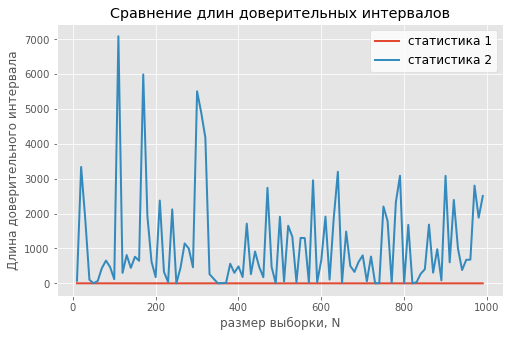

In [100]:
plt.figure(figsize=(8,5))
plt.plot(ns, first_len, label="статистика 1", linewidth=2)
plt.plot(ns, second_len, label="статистика 2", linewidth=2)
plt.legend(fontsize=12, facecolor ='white')
plt.title('Сравнение длин доверительных интервалов')
plt.ylabel('Длина доверительного интервала')
plt.xlabel('размер выборки, N')
plt.savefig('1.png')
plt.show()

Как видно из графика, для второй статистики длина интервала меняется независимо от $N$. Длина ДИ в данном случае не снижается с ростом количества наблюдений в выборке. При этом, если увеличить реальное значение дисперсии, то длина доверительного интервала будет значительно выше.

Построим отдельные графики границ доверительных интервалов для обеих статистик:

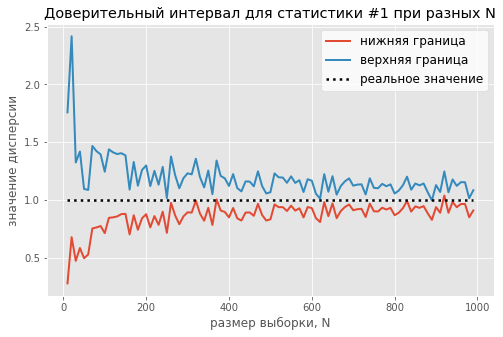

In [104]:
plt.figure(figsize=(8,5))
plt.plot(ns, first_a, label="нижняя граница", linewidth=2)
plt.plot(ns, first_b, label="верхняя граница", linewidth=2)
plt.plot(ns, [stdev ** 2 for i in range(len(ns))], label="реальное значение", linewidth=2.5, linestyle=':', color='black')
plt.legend(fontsize=12, facecolor ='white')
plt.title('Доверительный интервал для статистики #1 при разных N')
plt.ylabel('значение дисперсии')
plt.xlabel('размер выборки, N')
plt.savefig('2.png')
plt.show()

Как видно из графика, длина интервала снижается с ростом размера выборки $N$. Реальное значение дисперсии почти всегда попадает в границы данного доверительного интервала.

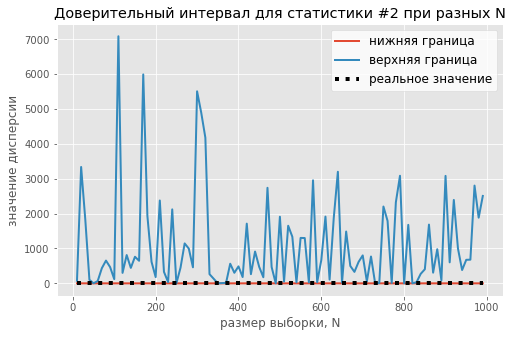

In [106]:
plt.figure(figsize=(8,5))
plt.plot(ns, second_a, label="нижняя граница", linewidth=2)
plt.plot(ns, second_b, label="верхняя граница", linewidth=2)
plt.plot(ns, [stdev ** 2 for i in range(len(ns))], label="реальное значение", linewidth=4, linestyle=':', color='black')
plt.legend(fontsize=12, facecolor ='white')
plt.title('Доверительный интервал для статистики #2 при разных N')
plt.ylabel('значение дисперсии')
plt.xlabel('размер выборки, N')
plt.savefig('3.png')
plt.show()

Для данной статистики нижняя граница ДИ практически совпадает с реальным значением дисперсии. Длина интервала не зависит от $N$